# http://adventofcode.com

Nothing elegant here, necessarily, just enjoying my first coding challenge event. As such, you've been warned that none of this should serve as excellent examples of how to solve these problems.

george (ty) tempel

In [ ]:
import pprint

---
# Day1

## Problem 1

Read the input data (Day1Puzzle1.txt), determine
which elf is carrying the most calories, and report
that calorie count

In [ ]:
day1_datafile = 'Day1Puzzle.txt'

In [ ]:
def split(sequence, sep):
    chunk = []
    for val in sequence:
        if val == sep:
            yield chunk
            chunk = []
        else:
            chunk.append(val)
    yield chunk


In [ ]:
input_file = open(day1_datafile, 'r')
lines = input_file.readlines()
input_file.close()
print("Number of calorie records: {}".format(len(lines)))

In [ ]:
lists = list(split(lines, '\n'))
print("Number of elves: {}".format(len(lists)))

In [ ]:
lists = [[int(i) for i in sub_list] for sub_list in lists]

In [ ]:
calories_per_elf = [sum(sub_list) for sub_list in lists]
print("Number of elves with calories: {}".format(len(calories_per_elf)))

In [ ]:
max_calories_for_an_elf = max(calories_per_elf)
index_for_max_calories_for_an_elf = calories_per_elf.index(max_calories_for_an_elf)
print("Max calories of {} on elf {}".format(max_calories_for_an_elf, index_for_max_calories_for_an_elf))
print(calories_per_elf[index_for_max_calories_for_an_elf])

## Problem 2

Now, puzzle 2, which asks for the top three elves carrying the most calories,
then determining what their total calorie haul is.

In [ ]:
import operator
indexed = list(enumerate(calories_per_elf))
top_3_tuples = sorted(indexed, key=operator.itemgetter(1))[-3:]
print("top 3 tuples: {}".format(top_3_tuples))

In [ ]:
top_3_indices_in_order = list(reversed([i for i, v in top_3_tuples]))
print("top 3 indices in order: {}".format(top_3_indices_in_order))

In [ ]:
total_calories_for_top_3 = sum([cals for idx, cals in top_3_tuples])
print("Total calories carried by top 3: {}".format(total_calories_for_top_3))

---
# Day 2

rock paper scissors tournament to determine who gets closest to the snack storage

Rock defeats Scissors, 
Scissors defeats Paper, 
and Paper defeats Rock. 

If both players choose the same shape, the round instead ends in a draw.

Data:
first column is play a/b/c, which would be rock/paper/scissors
second column is your x/y/z, which is rock/paper/scissors

scoring a round:
shape you played (rock = 1, paper = 2, scissors = 3)
+
round results (loss = 0, draw = 3, win = 6)

winner is player with highest total score of the rounds


In [ ]:
day2_datafile = 'Day2Puzzle.txt'

In [ ]:
mapping = { 'A': 'rock',
           'B': 'paper',
           'C': 'scissors',
           'X': 'rock',
           'Y': 'paper',
           'Z': 'scissors'
          }
play_points = { 'rock': 1, 'paper': 2, 'scissors': 3 }
round_points = { 'loss': 0, 'draw': 3, 'win': 6 }
# (them, you): resultsForYou
my_combinations = { ('rock', 'rock'): 'draw',
          ('rock', 'paper'): 'win',
          ('rock', 'scissors'): 'loss',
          ('paper', 'rock'): 'loss',
          ('paper', 'paper'): 'draw',
          ('paper', 'scissors'): 'win',
          ('scissors', 'rock'): 'win',
          ('scissors', 'paper'): 'loss',
          ('scissors', 'scissors'): 'draw'
         }

my_score = 0
with open(day2_datafile) as game_data:
    for line in game_data:
        (them, me) = tuple(line.strip().split(' '))
        theirs = mapping[them]
        mine = mapping[me]
        results = my_combinations[(theirs,mine)]
        score = play_points[mine] + round_points[results]
        my_score += score
        print("them {}({}) vs me {}({}) = my {} for {} points".format(them, theirs, me, mine, results, score))

print("my score = {}".format(my_score))

## part 2

new instructions: that 2nd column isn't your play, it means:
- X = you need to lose
- Y = you need to draw
- Z = you need to win

scoring is still calculated the same way

- rock > scissors
- paper > rock
- scissors > paper




In [ ]:
action_combinations = { ('rock', 'loss'): 'scissors',
          ('rock', 'draw'): 'rock',
          ('rock', 'win'): 'paper',
          ('paper', 'loss'): 'rock',
          ('paper', 'draw'): 'paper',
          ('paper', 'win'): 'scissors',
          ('scissors', 'loss'): 'paper',
          ('scissors', 'draw'): 'scissors',
          ('scissors', 'win'): 'rock'
         }

action_mapping = { 'A': 'rock',
           'B': 'paper',
           'C': 'scissors',
           'X': 'loss',
           'Y': 'draw',
           'Z': 'win'
          }

my_score = 0
with open(day2_datafile) as game_data:
    for line in game_data:
        (them, raw_action) = tuple(line.strip().split(' '))
        theirs = action_mapping[them]
        action = action_mapping[raw_action]
        mine = action_combinations[(theirs, action)]
        score = play_points[mine] + round_points[action]
        my_score += score
        print("them {}({}) & goal {}({}) means I play {} for {}".format(them, theirs, raw_action, action, mine, score))

print("my score = {}".format(my_score))

---
# Day 3

Sorting items from the rucksacks, which have two compartments,
and all items of a given type are meant to go into exactly one of the two compartments.

Each line uses upper/lower case letters to represent items of a type.

Note that a != A; they are different items

A record from the data file represents the contents of a rucksack, and exactly
half the input record represents one compartment, while the remaining half represents
the other compartment. Thus, 

`vJrwpWtwJgWrhcsFMMfFFhFp`

means that, for this rucksack, the first compartment contains items 

`vJrwpWtwJgWr`

and the other compartment contains items

`hcsFMMfFFhFp`

The only item that appears in *both* compartments, in this example, is item 'p'

The second rucksack's compartments contain `jqHRNqRjqzjGDLG` and `rsFMfFZSrLrFZsSL`. 

The only item type that appears in both compartments is uppercase L.

The third rucksack's compartments contain `PmmdzqPrV` and `vPwwTWBwg`; the only common item type is uppercase P.

1. The fourth rucksack's compartments only share item type v (`wMqvLMZHhHMvwLHjbvcjnnSBnvTQFn`)
1. The fifth rucksack's compartments only share item type t (`ttgJtRGJQctTZtZT`)
1. The sixth rucksack's compartments only share item type s (`CrZsJsPPZsGzwwsLwLmpwMDw`)

Items have priority:
- lowercase items have priority 1..26
- uppercase items have priority 27..52

In the above example, the priority of the item type that appears in both compartments 
of each rucksack is 
- 16 (p)
- 38 (L) 
- 42 (P) 
- 22 (v) 
- 20 (t)
- 19 (s)

the sum of these is 157.


## Problem 1
Using the data file, 
find the item type that appears in both compartments of each rucksack. What is the sum of the priorities of those item types?

In [ ]:
day3_datafile = 'Day3Puzzle.txt'

# read each line
#   split line in half, turning each half into a set
#   find intersection of the two sets
#   determine priority of the intersection
#   add to running total

def char_range(c1, c2):
    """Generates the characters from `c1` to `c2`, inclusive."""
    for c in range(ord(c1), ord(c2)+1):
        yield chr(c)

def priority_for_record(record = ''):
    n = len(record)
    first_slice = slice(0, n//2)
    second_slice = slice(n//2, n)
    first_group = set(record[first_slice])
    second_group = set(record[second_slice])
    common_items = list(first_group & second_group)
    priority = priorities[common_items[0]]
    return priority

lower_range = [c for c in char_range('a', 'z')]
upper_range = [c for c in char_range('A', 'Z')]

lower_mapping = dict(zip(list(lower_range), [ord(c) - ord('a') + 1 for c in lower_range]))
upper_mapping = dict(zip(list(upper_range), [ord(c) - ord('A') + 27 for c in upper_range]))
priorities = {} | lower_mapping | upper_mapping
print(priorities)

total_priorities = 0
with open(day3_datafile) as item_data:
    for record in item_data:
        priority = priority_for_record(record.strip())
        total_priorities += priority
        print("split {} : {} for {}".format(record, common_items, priority))

print("total priority: {}".format(total_priorities))

In [ ]:
r1 = set('CjhshBJCSrTTsLwqwqwb')
r2 = set('GtmnFHlDfcpHbLZjtTTRLWwb')
r3 = set('fDfNHHjVFNvvrvVBJJdS')

print("common = {}".format(r1 & r2 & r3))

## Puzzle 2 -- read in groups of three

In [ ]:

def priority_for_records(records):
    groups = [set(record) for record in records]
    common_items = list(groups.pop().intersection(*groups))
    priority = priorities[common_items[0]]
    print("group: {}; common = {}; priority = {}".format(records, common_items[0], priority))
    return priority
        
        
groups_of = 3
total_triple_priorities = 0
with open(day3_datafile) as infile:
    lines = []
    for line in infile:
        lines.append(line.strip())
        if len(lines) >= groups_of:
            priority = priority_for_records(lines)
            total_triple_priorities += priority
            lines = []
    if len(lines) > 0:
        priority = priority_for_records(lines)
        total_triple_priorities += priority


print("total priority: {}".format(total_triple_priorities))


---
# Day 4

Cleaning up sections of the camp.

Sections have unique ID numbers, and elves are assigned ranges of section IDs.

Yep, there's overlap.

Elves pair up and compare their assignments:
ex: 
```
2-4,6-8, or
.234.... for 2-4
....678. for 6-8
```
means first elf gets 2,3,4 and second elf gets 6,7,8: no overlap

ex: 
```
5-7,7-9
....567..
......789
```
means first elf gets 5,6,7 and second elf gets 7,8,9: overlapped 7

ex: 
```
2-8,3-7
.2345678.
..34567..
```
means 2nd elf's range is wholly contained within first elves' range



## Puzzle 1

Q: how many assignment pairs involve one range wholly containing another, and thus leaving 1 elf being redundant?

In [ ]:
day4_datafile = 'Day4Puzzle.txt'

# repeat:
#   read each line
#   split by ',' to get the pairs
#   split each pair by '-' into start/finish
#   create range for each pair (inclusive-end, so be sure to add one)
#   turn ranges into sets
#   wholly includes if a.issubset(b) or b.issubset(a)

def detect_overlaps(set_a = (), set_b = ()):
    wholly_contained = set_a.issubset(set_b) or set_b.issubset(set_a)
    overlaps = len(set_a & set_b) != 0
    return overlaps, wholly_contained

def detect_overlaps_in_ranges(r1, r2):
    sections = [set(r1), set(r2)]
    return detect_overlaps(*sections)


one_contained_within_the_other = []
any_kind_of_overlap = []
with open(day4_datafile) as infile:
    index = 0
    for line in infile:
        line = line.strip()
        ranges = []
        elves = line.split(',')
        for elf in elves:
            bounds = elf.split('-')
            ranges.append(range(int(bounds[0]), int(bounds[1]) + 1, 1))
        (overlaps, wholly_contained) = detect_overlaps_in_ranges(*ranges)

        if wholly_contained:
            one_contained_within_the_other.append(line)
        
        if overlaps:
            any_kind_of_overlap.append(line)
            
        index += 1

print("These {} lines represent wholly contained pairings:".format(len(one_contained_within_the_other)))
pprint.pprint(one_contained_within_the_other)

print("These {} lines represent overlapping pairings:".format(len(any_kind_of_overlap)))
pprint.pprint(any_kind_of_overlap)

## Puzzle 2:
    
how many overlap in any way?

note: added that to the solution above

---
# Day 5

Crane moving/restacking crates.
- crates move one at a time
- datafile describes initial state
- blank line
- instructions are like:
```
move 1 from 7 to 4
move 3 from 4 to 7
...
```
Crane moving/restacking crates.
- crates move one at a time
- datafile describes initial state
- blank line
- instructions are like:
```
move 1 from 7 to 4
move 3 from 4 to 7
...
```

### References:
- https://pythex.org
- https://regexr.com/73t0r#### References:
- https://pythex.org
- https://regexr.com/73t0r

## Problem 1

Q: what is the end state, described as the top item in each stack, such as
```
CMZAPQJER
```


In [ ]:
import re

day5_datafile = 'Day5Puzzle.txt'

instructions_start_here = 0
stack_record_markers = []
infile = open(day5_datafile)
# read until we get a blank line
while True:
    stack_record_markers.append(infile.tell())
    line = infile.readline()
    print(line)
    if not line.strip():
        instructions_start_here = infile.tell()
        break

# first stack record marker will be the names of the stacks
stack_record_markers.pop() # pop that blank line
marker = stack_record_markers.pop() # pop to get to the start of the stack names
infile.seek(marker)
# read the names of the stacks
line = infile.readline().strip()
print("stack name record: {}".format(line))
# parse the names and establish dictionary of lists using those as keys
stacks = {}
stack_names = line.split() #default delim is runs of spaces...cool
for index, name in enumerate(stack_names):
    stacks[name] = []

regex = re.compile('(\[\S\]|\s{3})\s?')
while stack_record_markers:
    marker = stack_record_markers.pop()
    infile.seek(marker)
    line = infile.readline()
    matches = regex.findall(line)
    
    for index, container in enumerate(matches):
        container_name = container.strip()
        stack = stacks[str(index + 1)]
        if stack is not None and container_name != '':
            stack.append(container_name)
            
pprint.pprint(stacks)

# now that we've worked out the starting conditions,
# follow the instructions, which are like
#   move 1 from 7 to 4
# meaning move 1 item from stack 7 to stack 4 
# or
#   move 3 from 4 to 7
# meaning move 3 items (in sequence, one at a time) from stack 4 to stack 7
infile.seek(instructions_start_here)

regex = re.compile("move\s+(?P<count>\d+)\s+from\s+(?P<from>\S+)\s+to\s+(?P<to>\S+)")

line = infile.readline()
while(line != ''):
    matches = regex.search(line)
    instructions = matches.groupdict()
    count = instructions['count']
    from_stack = stacks[instructions['from']]
    to_stack = stacks[instructions['to']]
    for i in range(int(instructions['count'])):
        container = from_stack.pop()
        to_stack.append(container)
    line = infile.readline()

# we only care about the top crate on each stack
# so iterate across the stacks and fetch the last/top item
top_items = []
for i in range(len(stacks)):
    stack = stacks[str(i+1)]
    top_items.append(stack[-1])

top_items = ''.join(top_items).replace('[', '').replace(']', '')
print("Top containers across the stacks:", top_items)
    
infile.close()

### Problem 2

Instead of moving one crate at a top, grab the set of N and move them, preserving order

#### References:
- https://www.programiz.com/python-programming/del

In [ ]:
import re

instructions_start_here = 0
stack_record_markers = []
infile = open(day5_datafile)
# read until we get a blank line
while True:
    stack_record_markers.append(infile.tell())
    line = infile.readline()
    print(line)
    if not line.strip():
        instructions_start_here = infile.tell()
        break

# first stack record marker will be the names of the stacks
stack_record_markers.pop() # pop that blank line
marker = stack_record_markers.pop() # pop to get to the start of the stack names
infile.seek(marker)
# read the names of the stacks
line = infile.readline().strip()
# parse the names and establish dictionary of lists using those as keys
stacks = {}
stack_names = line.split() #default delim is runs of spaces...cool
for index, name in enumerate(stack_names):
    stacks[name] = []

regex = re.compile('(\[\S\]|\s{3})\s?')
while stack_record_markers:
    marker = stack_record_markers.pop()
    infile.seek(marker)
    line = infile.readline()
    matches = regex.findall(line)
    
    for index, container in enumerate(matches):
        container_name = container.strip()
        stack = stacks[str(index + 1)]
        if stack is not None and container_name != '':
            stack.append(container_name)
            
pprint.pprint(stacks)

# now that we've worked out the starting conditions,
# follow the instructions, which are like
#   move 1 from 7 to 4
# meaning move 1 item from stack 7 to stack 4 
# or
#   move 3 from 4 to 7
# meaning move 3 items (in sequence, one at a time) from stack 4 to stack 7
infile.seek(instructions_start_here)

regex = re.compile("move\s+(?P<count>\d+)\s+from\s+(?P<from>\S+)\s+to\s+(?P<to>\S+)")

line = infile.readline()
while(line != ''):
    matches = regex.search(line)
    instructions = matches.groupdict()
    count = int(instructions['count'])
    from_stack = stacks[instructions['from']]
    to_stack = stacks[instructions['to']]    
    # print(line, "moving ", count, " items: ", from_stack[-count:])
    to_stack.extend(from_stack[-count:])
    del from_stack[-count:]
    line = infile.readline()

# we only care about the top crate on each stack
# so iterate across the stacks and fetch the last/top item
top_items = []
for i in range(len(stacks)):
    stack = stacks[str(i+1)]
    if stack:
        top_items.append(stack[-1])
    else:
        top_items.append(' ')
top_items = ''.join(top_items).replace('[', '').replace(']', '')
print("Top containers across the stacks:", top_items)
    
infile.close()

---
# Day 6

Setting up the communications.

The signal is a series of seemingly-random characters that the device receives one at a time. You need to add a subroutine to the device that detects a **start-of-packet marker** in the datastream. In the protocol being used by the Elves, the start of a packet is indicated by **a sequence of four characters that are all different**. Your subroutine needs to identify the first position where the four most recently received characters were all different. Specifically, it needs to *report the number of characters from the beginning of the buffer to the **end of the first such four-character marker***.

So basically report the 1-based index of where the lst character of the sequence is found. (Or, 0-based index + 1)

For example, you receive:

`mjqjpqmgbljsphdztnvjfqwrcgsmlb`

`mjq` can't be the start of the marker because the next character is a repeat (`j`), so keep looking. Keep reading, and once you've read the 4th, 5th, 6th, and 7th you'll notice that `jpqm` is the start of packet marker, and thus should report 7 as the answer.

mjq**jpqm**gbljsphdztnvjfqwrcgsmlb

`mjqjpqmgbljsphdztnvjfqwrcgsmlb`

`1234567`


More examples:

- b**vwbj**plbgvbhsrlpgdmjqwftvncz`: first marker after character 5
- np**pdvj**thqldpwncqszvftbrmjlhg: first marker after character 6
- nznrnfr**fntj**fmvfwmzdfjlvtqnbhcprsg: first marker after character 10
- zcfzfwz**zqfrl**jwzlrfnpqdbhtmscgvjw: first marker after character 11





In [ ]:
data_file = 'Day6Puzzle.txt'

buffer = ''
with open(data_file) as infile:
    buffer = infile.read()

print("Buffer length = {}".format(len(buffer)))
print(buffer)


## Problem 1
Determine how many characters need to be processed before the first start-of-packet marker is detected.

In [ ]:

def find_end_of_marker_using_length(marker_length = 0):
    marker_position = -1
    if marker_length < 1:
        return marker_position    
    
    start_index = 0
    end_index = 0

    found = False
    while not found:
        end_index = start_index + marker_length
        span = set(buffer[start_index:end_index])
        if len(span) == marker_length:
            marker_position = end_index
            print("Found length {} marker in buffer[{}:{}], {}; answer is {}".format(marker_length,
                                                                                     start_index,
                                                                                     end_index,
                                                                                     buffer[start_index:end_index],
                                                                                     marker_position))
            break
        else:
            start_index += 1
    
    return marker_position

marker_position = find_end_of_marker_using_length(4)
    

## Problem 2

Now you have to look for messages.

The start-of-message marker is a set of 14 distinct characters, just like the start-of-packet marker.

See solution above, which has been parameterized to accept marker length.


In [ ]:
marker_position = find_end_of_marker_using_length(14)


---
# Day 7

Directory traversals, file-size determination, and housekeeping!

The input file describes a series of "commands" navigating a filesystem.

Find directories that are candidates for deletion. Directories themselves are zero size, but the files within do have size. Thus, you need to determine the total size of each directory, including the subdirectories.

The `cd` command functions as expected, changing to
- a subdirectory
- .. out one level
- / the root directory

The `ls` command functions as expected, printing files and immediate subdirectories.
- `123 abc` means a file named `abc` of size `123`
- `dir xyz` means a directory named `xyz`

## Problem 1

Find all directories with a total size of AT MOST 100000, then calculate the sum of their total sizes.


In [ ]:
from anytree import Node, NodeMixin, RenderTree, PreOrderIter
import anytree
import functools
from collections import namedtuple

# use tree for the overall structure

DeviceFile = namedtuple("DeviceFile", "name,size")

class DeviceDir(object):
    def __init__(self, name):
        self.name = name
        self.directory_files = set() # this will be a set of DeviceFile tuples
    
    def size(self):
        local_file_total = functools.reduce(lambda accumulator, ftuple: accumulator + ftuple.size, self.directory_files, 0)
        dir_total = 0
        for child in self.children:
            dir_total += child.size()
        return local_file_total + dir_total
    
    def add_file(self, device_file:DeviceFile):
        self.directory_files.add(device_file)
    
    def find_child_dir(self, dir_name):
        found_item = next(filter(lambda n: n.name == dir_name, self.children), None)
        return found_item
    
    def child_dir_names(self):
        child_names = [c.name for c in self.children]
        return child_names
    
    def path_string(self):
        items = [item.name for item in list(self.path)]
        return "/".join(items)


class DeviceDirNode(DeviceDir, NodeMixin):
    def __init__(self, name, parent=None, children=None):
        super(DeviceDirNode, self).__init__(name)
        self.parent = parent
        if children:
            self.children = children



datafile = 'Day7Puzzle.txt'

def do_cd(dir_name, cwd):
    # if cwd and cwd.name == dir_name:
    #     print("staying put @ {} (cwd = {})".format(dir_name, cwd.path_string()))
    #     return cwd
    if dir_name == '..':
        # print("^^ cd {} [from cwd = {} to {}]".format(dir_name, cwd.path_string(), cwd.parent.path_string()))
        return cwd.parent
    elif dir_name == '/':
        # print("// heading for the root")
        return cwd.root
    elif found_child := cwd.find_child_dir(dir_name):
        # print("vv cd {} [from {} into {}]".format(dir_name, cwd.path_string(), found_child.path_string()))
        return found_child
    else:
        print("NO IDEA WHAT TO DO WITH ", dir_name)
    return cwd


def do_ls(cmd_line):
    return


cd_prefix = '$ cd '
ls_prefix = '$ ls'
directory_prefix = 'dir '

current_dir = None

root_dir = current_dir = DeviceDirNode("/")
line_index = 0
with open(datafile) as infile:
    file_regex = re.compile('(?P<size>\d+)\s+(?P<name>\S+)\s*')

    for line in infile:
        line = line.strip()
        line_index += 1
        # print("processing line #{}: {}".format(line_index, line))
        if line.startswith(cd_prefix):
            current_dir = do_cd(line.replace(cd_prefix, ''), current_dir)
        elif line.startswith(ls_prefix):
            do_ls(line.replace(ls_prefix, ''))
        elif line.startswith(directory_prefix):
            # add to the current directory
            directory_name = line.replace(directory_prefix, '').strip()
            # print(" dir {} in {}".format(directory_name, current_dir.name))
            DeviceDirNode(directory_name, parent=current_dir)
        else:
            matches = file_regex.search(line)
            file_info = matches.groupdict()
            if file_info:
                count = file_info['size']
                current_dir.add_file(DeviceFile(name=file_info['name'], size=int(file_info['size'])))
            else:
                print("!!! NO IDEA HOW TO HANDLE '{}'".format(line))
            
for pre, _, node in RenderTree(root_dir):
    print("%s%s %s" % (pre, node.name, list(map(lambda f: "{}[{}]".format(f.name,f.size), node.directory_files))))
    
for pre, _, node in RenderTree(root_dir):
    print("%s%s %s" % (pre, node.name, node.size()))

size_limit = 100000
found = anytree.search.findall(root_dir, filter_=lambda node: node.size() <= 100000)
print("{} directories found with total size of at most {}".format(len(found), size_limit)) 
sum_of_totals = 0;
for t in found:
    print("directory {}, size = {}".format(t.path_string(), t.size()))
    sum_of_totals += t.size()
print("Total of those directories: {}".format(sum_of_totals))

## Part 2

Need to free-up space. There's a total of 70000000, and we need at least 30000000, so need to find a directory that we can delete to free-up some space.

Our directory/file structure already occupies a certain amount of space. So total_space - already_used_space gives us how much is left. So we need to free-up required_space - already_used_space in order to be successful. Find candidate directories and choose the *smallest* that will satisfy the requirements.


In [ ]:
total_space = 70000000
required_space = 30000000
used_space = root_dir.size()
available_space = total_space - used_space
needed_space = required_space - available_space
print("total {}".format(total_space))
print("used  {}".format(used_space))
print("avail {}".format(available_space))
print("reqd  {}".format(required_space))
print("needed  {}".format(needed_space))

found = anytree.search.findall(root_dir, filter_=lambda node: node.size() >= needed_space)
# data.sort(key=lambda tup: tup[1], reverse=True)
found = sorted(found, key= lambda t: t.size())
print("{} directories found with total size of at most {}".format(len(found), needed_space)) 
for t in found:
    print("directory {}, size = {}".format(t.path_string(), t.size()))

print("Smallest directory to delete is {}, for {}".format(found[0].path_string(), found[0].size()))

# Day 8

Treetop Tree House

Is there enough cover to keep a treehouse hidden? Thinking like it's a chessboard, are there enough trees visible (when viewed from outside) a row or column?

The input describes the height of each tree, 0..9 meaning smallest to tallest.

```
30373
25512
65332
33549
35390
```

A tree is **visible** if all trees between it and a grid-edge are shorter than it. Trees on the grid edges are, naturally, visible. Thus, only **interior** trees are of consideration. Thus, from the example above, need to consider these interior trees:

```
.....
.551.
.533.
.354.
.....
```

Top-left `5` is visible from left and top. (The right `5` blocks it from the right, as does the middle `5`.)

The top-middle `5` is visible from top and right.

The top-right `1` is not visible from any direction (immediately north and east are trees of `7` and `2`, respectively)

The left-middle `5` is visible only from the right.

The center `3` is not visible from any direction, as all surrounding trees are of the same or greater height.

The right-middle `3` is visible from the right.

The bottom-middle `5` is visible, but the leading `3` and trailing `4` are not visible as they are surrounded NSEW by higher values.


## Problem 1

Given the above, how many trees (including the edge) are visible in the arrangement described in the data file?

In the above example, there would be the 16 edge trees, plus the 5 visible interior trees, yielding 21 visible trees.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea

datafile = 'Day8Puzzle.txt'

data = []

with open(datafile) as infile:
    for line in infile:
        line = line.strip()
        row = [int(c) for c in line]
        data.append(row)

print("forest is {} x {}".format(len(data), len(data[0])))


def count_visible_trees(grid):
    # but what about 0 values on the edges? does that matter?
    count = 2 * len(grid) + 2 * (len(grid[0]) - 2) # edges
    print("count {}".format(count))

    for i in range(1, len(grid)-1):
        for j in range(1, len(grid[0])-1):
            # neighbors up/north
            if all(grid[k][j] < grid[i][j] for k in range(0,i)):
                # everything north of this tree is shorter
                # when viewed southward/down to this tree
                count += 1
                continue
            # neighbors right/east
            if all(grid[i][k] < grid[i][j] for k in range(j+1, len(grid[i]))):
                count += 1
                continue
            # neighbors down/south
            if all(grid[k][j] < grid[i][j] for k in range(i+1, len(grid))):
                count += 1
                continue
            # neighbors left/west
            if all(grid[i][k] < grid[i][j] for k in range(0, j)):
                count += 1
                continue
    return count

visible_tree_count = count_visible_trees(data)
print("{} visible trees".format(visible_tree_count))

#     # what if there is no tree in a grid location?
#     count = len([v for v in grid[0] if v]) + #top edge
#             len([v for v in grid[max_x - 1] if v]) + #bottom edge
#             len([]) + #left edge
#             len([]) #right edge


In [ ]:
df = pd.DataFrame(data)
df


In [ ]:
zero = df.values.max(axis=0)
one = df.values.max(axis=1)
overall = df.max(axis=1)
df.max().max()
df[0]

In [ ]:
df.to_numpy().max()

In [ ]:
f, ax = plt.subplots(figsize=(20, 20))
sea.heatmap(df, cmap='crest', annot=False, ax = ax)

In [ ]:
from matplotlib.colors import LogNorm
# see if we can exaggerate the data to see the tallest trees
f, ax = plt.subplots(figsize=(20, 20))
sea.heatmap(df, cmap='crest', annot=False, ax = ax, norm=LogNorm())

In [ ]:
# visualize the scenic scores of the trees
df2 = pd.DataFrame(np.array(scores).reshape(len(data),len(data[0])))
f, ax = plt.subplots(figsize=(20,20))
sea.heatmap(df2, cmap='crest', ax = ax)

## Problem 2

The elves want a spot in the canopy where they can see a lot of trees.

The **scenic score** of a tree is determined by multiplying each of the 4 ordinal viewing distances (trees up to and including this tree height).


In [ ]:
def get_scenic_score(grid, i, j):
    # get north
    north_score = 0
    for k in range(i - 1, -1, -1):
        north_score += 1
        if grid[k][j] >= grid[i][j]:
            break
        
    # get east
    east_score = 0
    for k in range(j + 1, len(grid[i])):
        east_score += 1
        if grid[i][k] >= grid[i][j]:
            break
            
    # get south
    south_score = 0
    for k in range(i + 1, len(grid)):
        south_score += 1
        if grid[k][j] >= grid[i][j]:
            break
    # get west
    west_score = 0
    for k in range(j - 1, -1, -1):
        west_score += 1
        if grid[i][k] >= grid[i][j]:
            break

    return north_score * east_score * south_score * west_score

scores = list(get_scenic_score(data, i, j) for i in range(len(data)) for j in range(len(data[0])))
max_scenic_score = max(scores)
print("Best scenic score: {} out of {} ({} non-zero) scores".format(max_scenic_score,
                                                                    len(scores),
                                                                    len([s for s in scores if s])))



---
# Day 9: Rope Bridge

Ropes, knots, and Planck Length

The head and tail (knots) of a rope move such that they must always be touching. If the head moves in any direction, the tail must follow and be at most one position away (though it could also be superimposed).

If the head and tail aren't touching after the head moves (meaning adjacent or on the immediate 4 diagonals) and aren't in the same row or column, the tail ALWAYS moves one step diagonally to keep up -- that is, it doesn't move just on x/y axes.

The head will move some distance, and the tail must then catch-up with each move. At the start the head and tail are in the same position, superimposed.

The data file is a set of records, where each record describes the head's direction (R, U, L, D for right, up, left, down) and a number indicating distance in that direction. Example:

```
R 2
D 1
R 2
L 2
D 1
R 2
U 1
D 1
```

## Problem 1

You need to count-up all of the positions on the grid that *the tail visited at least once*. Remember the starting position, play through the head/tail movements, and record which coordinates the tail has visited at least once. Thus, anywhere that the tail has been, including the starting position.

### Notes/Observations
* We don't know the dimensions of the grid -- it could be infinite
* We're assuming the starting point is in the lower-left corner (could be anywhere, though, as we're just tracking the number of places the tail has been)
* We don't know how many moves there are
* We don't care about the visited positions, only the number of them. HOWEVER, we don't want to count a position multiple times.
* We could assume starting is the origin, and every position is an x,y tuple/coordinate
* The tail has movement restrictions
    * it doesn't **always** move
    * it only moves if it's not touching (adjacent axially or diagonally) or superimposed
    * the tail never moves onto the head; the head, however, can move atop the tail (in which case the tail doesn't have to move)
    * it appears that if the distance between the head and tail >= 2 (actually, > sqrt(2)) then the tail moves
        * can use `math.dist((headx, heady), (tailx, taily))` to determine that distance


In [ ]:
import re
import math

datafile = 'Day9Puzzle.txt'

directions = {
    'L' : 'left',
    'R' : 'right',
    'U' : 'up',
    'D' : 'down'
}

move = {
    'L': (-1, 0),
    'R': (1, 0),
    'U': (0, 1),
    'D': (0, -1)
}

class Rope(object):
    def __init__(self, number_of_knots:int = 2, starting_position:tuple = (0,0)):
        # 2 knots means simply a head and a tail
        # 3 knots would mean head, middle, tail
        #...
        # 10 knots means head plus 9, as in Problem 2
        self._knots = [starting_position for i in range(number_of_knots)]
        self.tail_locations = set[tuple]()
        self.tail_locations.add(starting_position)

    @property
    def length(self):
        return len(self._knots)
    
    @property
    def head(self):
        return self._knots[0]

    @head.setter
    def head(self, new_location:tuple):
        self._knots[0] = new_location

    @property
    def tail(self):
        return self._knots[-1]
    
    def remember_tail(self):
        self.tail_locations.add(self.tail)
            
    @property
    def knot(self):
        return self._knots
    
    def distance(self, knot_one:tuple, knot_two:tuple):
        return math.dist(knot_one, knot_two)

    def move(self, direction:str, amount:int) -> tuple:
        move = {
            'L': (-1, 0),
            'R': (1, 0),
            'U': (0, 1),
            'D': (0, -1)
        }
        
        movement = move[direction]
        for i in range(amount):
            self.head = (self.head[0] + movement[0], self.head[1] + movement[1])
            # head has moved, now make the rest follow
            for j in range(1, self.length):
                self.knot[j] = self.move_knot_relative_to(knot=self.knot[j], reference_knot=self.knot[j-1])
                self.remember_tail()
        
        return self.head

    def move_knot_relative_to(self, knot:tuple, reference_knot:tuple) -> tuple:
        distance = self.distance(reference_knot, knot)
        if distance >= 2:
            knot_x, knot_y = knot
            delta_x = reference_knot[0] - knot_x
            delta_y = reference_knot[1] - knot_y
            if delta_x and delta_y:
                # not on same row or column, so determine
                # the diagonal move
                slope = delta_y / delta_x
                if slope > 0 and delta_x < 0:
                    # reference knot is below/left of the knot
                    # so move the knot to the left and down
                    knot_x -= 1
                    knot_y -= 1
                elif slope > 0 and delta_x > 0:
                    # reference knot is above/right of the knot
                    # so move the knot to the right and up
                    knot_x += 1
                    knot_y += 1
                elif slope < 0 and delta_x < 0:
                    # reference knot is above/left of the knot
                    # so move up and left
                    knot_x -= 1
                    knot_y += 1
                elif slope < 0 and delta_x > 0:
                    # reference knot is below/right of the knot
                    # so move down/right
                    knot_x += 1
                    knot_y -= 1
                else:
                    print("No idea of how to move the node?")
            else:
                if delta_x > 1:
                    knot_x += 1
                if delta_x < -1:
                    knot_x -= 1
                if delta_y > 1:
                    knot_y += 1
                if delta_y < -1:
                    knot_y -= 1
            new_loc = (knot_x, knot_y)
            knot = new_loc
        return knot


with open(datafile) as infile:
    movement_regex = re.compile('(?P<direction>[LRUD])\s+(?P<count>\d+)\s*')
    knot_count = 2
    rope = Rope(number_of_knots=knot_count, starting_position=(0,0))
    for line in infile:
        line = line.strip()
        # print("{}: {} ... head/tail is currently {}/{}".format(index, line, rope.head, rope.tail))
        matches = movement_regex.search(line)
        movement_info = matches.groupdict()
        rope.move(movement_info['direction'], int(movement_info['count']))

print("Unique tail locations when using {} knots: {}".format(knot_count, len(rope.tail_locations)))

## Puzzle 2

It's not a rope -- well, ok, it's a rope with a bunch of knots, not just the head and tail -- but think of it as a snake or centipede, like in the game Centipede.

Now it's got 10 knots: the head, plus 9 more (8 more, then the tail). The later knots don't move until the earlier ones move.

Assumptions:
* No knot/segment moves if it's coincident/superimposed with a higher not
* think of coincident/superimposed knots as being stacked on a coordinate
* knots/segments follow along in a track -- that is:
    * head moves, reveals 1
    * head moves again, may cause 1 to follow, which would then reveal 2
    * head can loop around and cover a later segment, which would then cause 1 to eventually cover that later segment, etc
    * tail moves when the next-to-last segment moves and pulls it along
* thus, later segments follow earlier segments
    * later segments move relative to earlier segments


In [ ]:
with open(datafile) as infile:
    movement_regex = re.compile('(?P<direction>[LRUD])\s+(?P<count>\d+)\s*')
    knot_count = 10
    rope = Rope(number_of_knots=knot_count, starting_position=(0,0))
    for line in infile:
        line = line.strip()
        # print("{}: {} ... head/tail is currently {}/{}".format(index, line, rope.head, rope.tail))
        matches = movement_regex.search(line)
        movement_info = matches.groupdict()
        rope.move(movement_info['direction'], int(movement_info['count']))

print("Unique tail locations when using {} knots: {}".format(knot_count, len(rope.tail_locations))) # was 6391 w/2 knots

---
# Day 10

Your elf-device's CRT display replacement and video signals.

The display subsystem has a circuit and CPU that ticks at a constant rate or cycle. So now you have to figure out the signal emitted by the CPU.

The CPU has a single register, `X`, that starts with the value `1`. There are only two instructions:
- `addx V`, which takes **two cycles** to complete, after which register `X` has been increased by the value `V` (which can be a negative value)
- `noop` which simply consumes one clock cycle

An example:

```
noop
addx 3
addx -5
```

1. 1st cycle, `noop` begins, and `X` is `1`. Afterwards, nothing happens and `X` is still `1`.
1. 2nd cycle, `addx 3` begins execution, and `X` is still `1`. (This is the first cycle of the `addx` instruction.)
1. 3rd cycle, at the start `X` is still `1`, and by the end `X` is now `4` (`1+3`)
1. 4th cycle, `addx -5` begins, and `X` is still `4`
1. 5th cycle, `X` is still `4`, and by the end `X` is now `-1` (`4 + -5`)



You notice the *signal strength* (cycle number * X register value) during the 20th cycle, and every 40 cycles after that:
- 20th
- 60th (20 + 40)
- 100th (60 + 40)
- 140th
- 180th
- 220th

| cycle | initial value | operation | end value |
| -- | -- | -- | -- |
| 1 | 1 | noop | 1 |
| 2 | 1 | addx 3 | 1 |
| 3| 1 | 1+3 = 4 | 4 |
| 4| 4 | addx -5 | 4 |
| 5 | 4 | 4+ -5 | -1 |


## Problem 1

Find the signal strength during the 20th, 60th, 100th, 140th, 180th, and 220th cycles. What is the sum of these six signal strengths?

Data file begins:
```
addx 2
addx 3
noop
addx 1
addx 27
addx -23
```

| cycle | initial value | operation | end value |
| --| - | --          | - |
| 1 | 1 | addx 2      | 1 |
| 2 | 1 | 1 + 2 = 3   | 3 |
| 3 | 3 | addx 3      | 3 |
| 4 | 3 | 3 + 3 = 6   | 6 |
| 5 | 6 | noop        | 6 |
| 6 | 6 | addx 1      | 6 |
| 7 | 6 | 6 + 1 = 7   | 7 |
| 8 | 7 | addx 27     | 7 |
| 9 | 7 | 7 + 27      | 34 |
| 10| 34| addx -23    | 34 |
| 11| 34| 34 + -23    | 11 |


In [106]:
from collections import namedtuple

datafile = 'Day10Puzzle.txt'

Cycle = namedtuple("Cycle", "start end")

x = 1
cycles = [Cycle(x,x)]
with open(datafile) as infile:
    for line in infile:
        line = line.strip().lower()
        parts = line.split(' ')
        cycles.append(Cycle(x, x))
        if parts[0] == "addx":
            cycles.append(Cycle(x, x + int(parts[1])))
            x += int(parts[1])

of_interest = range(20,len(cycles),40)
values = [cycles[i].start * i for i in of_interest]
print("Sum of {} cycles {}/{}: {}".format(len(cycles)-1, of_interest, values, sum(values)))

Sum of 240 cycles range(20, 241, 40)/[420, 1020, 2100, 2940, 1440, 4620]: 12540


## Problem 2

The Sprite

There's a sprite that's 3 pixels wide, and the `X` register sets the horizontal position of the **middle** of the sprint. The "display" is 40x6, and lines are drawn top-left, across, wrap to the next row, across, etc. Each pixel is a clock cycle, essentially:

```
Cycle   1 -> ######################################## <- Cycle  40
Cycle  41 -> ######################################## <- Cycle  80
Cycle  81 -> ######################################## <- Cycle 120
Cycle 121 -> ######################################## <- Cycle 160
Cycle 161 -> ######################################## <- Cycle 200
Cycle 201 -> ######################################## <- Cycle 240
```
HOWEVER, the pixels start w/pixel 0. So `pixel = cycle - 1`.

If one of the sprite's three pixels is the **current** pixel (that is, the one being drawn at the cycle), then that pixel is **lit** (`#`); otherwise, that pixel is **dark** (`.`).

The starting value of `X` is 1. Because `X` indicates the middle of the sprite, the starting position of the sprite on it's zero-based reference line would be:

```
sprite: ###.....................................

Cycle   1 -> #....................................... <- Cycle  40
Cycle  41 -> ........................................ <- Cycle  80
Cycle  81 -> ........................................ <- Cycle 120
Cycle 121 -> ........................................ <- Cycle 160
Cycle 161 -> ........................................ <- Cycle 200
Cycle 201 -> ........................................ <- Cycle 240
```
Value of `X` is `1`, so center of sprint is on position 1 on it's reference line, covering 0, 1, 2. At least one of the sprite elements is visible, so on Cycle 1 we set **pixel 0** (because pixel = cycle - 1, pixel = 1 - 1 = 0) to `#`, as seen above.

using the example data, during cycle 2:
- at the start, it's cycle 2, and at least one of the sprite elements is showing, so we draw pixel 1 (because pixel = cycle - 1, so pixel = 2 - 1 = 1). This yields the following:

```
Cycle   1 -> ##...................................... <- Cycle  40
Cycle  41 -> ........................................ <- Cycle  80
Cycle  81 -> ........................................ <- Cycle 120
Cycle 121 -> ........................................ <- Cycle 160
Cycle 161 -> ........................................ <- Cycle 200
Cycle 201 -> ........................................ <- Cycle 240
```

The sprite position is updated when the X register is updated, so the sprite is now
```
sprite: ...............###......................
```
since, in the example the `addx 15` completes at the end of cycle 2 and the `X` value becomes `16` -- thus the middle of the sprite is at position 16 (zero-based, remember).

cycle 3 starts, none of the three sprite pixels are the current pixel (pixel = cycle - 1; pixel = 3 - 1; pixel = 2; sprite covers 15/16/17, so pixel2 should be dark)

```
Cycle   1 -> ##...................................... <- Cycle  40
Cycle  41 -> ........................................ <- Cycle  80
Cycle  81 -> ........................................ <- Cycle 120
Cycle 121 -> ........................................ <- Cycle 160
Cycle 161 -> ........................................ <- Cycle 200
Cycle 201 -> ........................................ <- Cycle 240
```

By letting the input data run to completion, what are the eight capital letters appearing on your CRT?

In [107]:
def pixel_in_sprite(cycle:int, center_of_sprite:int, width:int):
    pixel = cycle - 1
    return (pixel % width) in range(center_of_sprite - 1, center_of_sprite + 2)

crt = []
width = 40

for cycle_index, x_register in enumerate(cycles):
    if cycle_index == 0:
        continue
    crt.append('#' if pixel_in_sprite(cycle_index, x_register.start, width) else '.')

for row in [crt[i:i+width] for i in range(0, len(crt), width)]:
    print(''.join(row))


####.####..##..####.####.#....#..#.####.
#....#....#..#....#.#....#....#..#.#....
###..###..#......#..###..#....####.###..
#....#....#.....#...#....#....#..#.#....
#....#....#..#.#....#....#....#..#.#....
#....####..##..####.####.####.#..#.####.


---
# Day 11

Monkey in the Middle

Yep, monkeys have raided your pack and are tossing things around over your head. You need to be able to predicdt where they'll throw the items -- and it seems that the monkeys operate based upon how worried you are about each item.

The puzzle input represents your notes:

```
Monkey 0:
    Starting items: 79, 98
    Operation: new = old * 19 (which stays with the "item")
    Test: divisible by 23
        If true: throw to monkey 2 
        If false: throw to monkey 3

Monkey 1:
    Starting items: 54, 65, 75, 74
    Operation: new = old + 6
    Test: divisible by 19
        If true: throw to monkey 2
        If false: throw to monkey 0
```

- Starting items lists your worry level for each item the monkey is currently holding in the order they will be inspected.
- Operation shows how your worry level changes as that monkey inspects an item. (An operation like `new = old * 5` means that your worry level after the monkey inspected the item is five times whatever your worry level was before inspection.)
- Test shows how the monkey uses your worry level to decide where to throw an item next.
    - If true shows what happens with an item if the Test was `true`.
    - If false shows what happens with an item if the Test was `false`.

Sequence:
1. For each round
    1. For a monkey
        1. for each item the monkey holds (this is a turn)
            1. monkey picks item (worry level)
            1. monkey inspects item and the operation adjusts worry level
            1. monkey gets bored, worry level / 3
            1. test to determine action
            1. perform action (and transferring the current worry level)
        1. next item
    1. next monkey
1. next round



In [273]:
datafile = 'Day11Puzzle.txt'

class WorryItem(object):
    def __init__(self, worry_value):
        self._worry = worry_value

    def __str__(self):
        return "{}".format(self.worry)

    @property
    def worry(self):
        return self._worry
    
    @worry.setter
    def worry(self, value):
        self._worry = value


class Monkey(object):
    def __init__(self, metadata:list[str]):
        self._inspection_count = 0
        self._common_test_value = None
        
        # first line is the monkey's name
        self._name = metadata[0].lower().split(':')[0].strip()
        
        self._items = []
        # next is the initial worry items
        for worry_value in metadata[1].strip().split(':')[-1].split(','):
            self._items.append(WorryItem(int(worry_value)))
        
        # next is the operation
        operation = metadata[2].split(':')[-1].strip()
        operation_parts = operation.split()
        if '*' in operation_parts:
            self._operation = '*'
        elif '+' in operation_parts:
            self._operation = '+'
            self._operation_value = int(operation_parts[-1])
        elif '/' in operation_parts:
            self._operation = '/'
            self._operation_value = int(operation_parts[-1])
        else:
            self._operation = None

        self._operation_value = None if 'old' in operation_parts[-1] else int(operation_parts[-1])
        
        
        # next is the test
        rule_parts = metadata[3].split(':')[-1].strip().split()
        if 'divisible' in rule_parts:
            self._test = 'divisible'
        else:
            self._test = None
        self._test_value = int(rule_parts[-1])

        
        # last two are the actions related to the test
        self._actions = {}
        for action in metadata[-2:]:
            action = action.lower()
            key = 'true' in action
            self._actions[key] = action.split('to')[-1].strip()            

    def __str__(self):
        return "{}: {}, {} inspections".format(self.name, 
                                               [item.worry for item in self._items],
                                               self.inspection_count)

    def __repl__(self):
        return self.__str__()

    @property
    def inspection_count(self):
        return self._inspection_count

    @property
    def name(self) -> str:
        return self._name
    
    @property
    def operation(self) -> str | None:
        return self._operation
    
    @property
    def operation_value(self) -> str | None:
        return self._operation_value
    
    @property
    def test(self) -> str:
        return self._test
    
    @property
    def test_value(self):
        return self._test_value
    
    @test_value.setter
    def test_value(self, value):
        self._test_value = value
    
    @property
    def common_test_value(self):
        return self._common_test_value
    
    @common_test_value.setter
    def common_test_value(self, value):
        self._common_test_value = value
    
    @property
    def actions(self) -> dict:
        return self._actions

    def inspects(self, item:WorryItem) -> WorryItem:
        self._inspection_count += 1
        new_value = None
        old_value = item.worry
        value = self.operation_value
        if value == None:
            value = old_value
        if '*' == self.operation:
            new_value = old_value * value
        elif '+' == self.operation:
            new_value = old_value + value
        elif '/' == self.operation:
            new_value = old_value / value
        item.worry = int(new_value)
        return item
    
    def gets_bored(self, item:WorryItem, extra_worried:bool=False) -> WorryItem:
        if not extra_worried:
            item.worry = item.worry / 3
        elif item.worry > self.common_test_value:
            # extra worried, AND things are getting too big
            item.worry = item.worry % self.common_test_value

        return item

    def tests(self, item:WorryItem) -> True | False:
        result = False
        if self.test == 'divisible':
            result = item.worry % self.test_value == 0
        return result
    
    def who_to_throw_to(self, key:bool):
        return self.actions[key]

    def catch_item(self, item:WorryItem):
        self._items.append(item)
        
    def throw_to(self, item:WorryItem, target_monkey:Monkey):
        target_monkey.catch_item(item)
        # self._items.remove(item)
        
    def turn(self, all_monkeys:{}, extra_worried:bool=False):
        for item in list(self._items):
            item = self.inspects(item)
            item = self.gets_bored(item, extra_worried)
            test_results = self.tests(item)
            target_monkey = all_monkeys[self.who_to_throw_to(test_results)]
            self.throw_to(item, target_monkey)
        self._items = []


def load_monkeys():
    monkeys_in_order = []
    monkeys = {}

    with open(datafile) as infile:
        buffer = []
        for line in infile:
            line = line.strip().lower()
            if line:
                buffer.append(line)
            else:
                monkey = Monkey(buffer)
                monkeys[monkey.name] = monkey
                monkeys_in_order.append(monkey)
                buffer = []
        if buffer:
            monkey = Monkey(buffer)
            monkeys[monkey.name] = monkey
            monkeys_in_order.append(monkey)
            buffer = []
    
    return monkeys_in_order, monkeys


## Part 1 

This goes on and on ... and on. You'll have to focus on the **two most active monkeys**, so count the **total number of times each monkey inspects items** over the course of **20 rounds**. The most active monkeys are the items with the highest inspection scores, and the **monkey business** score is the product of those two inspection scores.

In [274]:
monkeys_in_order, monkeys = load_monkeys()

max_rounds = 20
extra_worried = False

for round in range(0,max_rounds):
    for monkey in monkeys_in_order:
        monkey.turn(monkeys, extra_worried)
    print("round {} completed".format(round))

# [(monkey.name, monkey.inspection_count) for monkey in monkeys_in_order]
by_inspection_count = sorted([monkey.inspection_count for monkey in monkeys_in_order])
monkey_business = by_inspection_count[-1] * by_inspection_count[-2]
print("Monkey business score: {}".format(monkey_business))

round 0 completed
round 1 completed
round 2 completed
round 3 completed
round 4 completed
round 5 completed
round 6 completed
round 7 completed
round 8 completed
round 9 completed
round 10 completed
round 11 completed
round 12 completed
round 13 completed
round 14 completed
round 15 completed
round 16 completed
round 17 completed
round 18 completed
round 19 completed
Monkey business score: 65790


## Problem 2

Now do it for 10000 rounds, and you're going to be extra worried


In [ ]:
from functools import reduce
from math import lcm

monkeys_in_order, monkeys = load_monkeys()


# inspect the monkey divisor values (monkey.test_value) and make them all uniform by setting the
# to the super-modulo (multiply them all together)
supermod = reduce((lambda acc, x: acc * x), [monkey.test_value for monkey in monkeys_in_order])
supermod = lcm(*[monkey.test_value for monkey in monkeys_in_order])
print("Test values are: {}, supermod: {}".format([monkey.test_value for monkey in monkeys_in_order], supermod))
for monkey in monkeys_in_order:
    monkey.common_test_value = supermod


    
max_rounds = 10000
extra_worried = True

for round in range(0,max_rounds):
    for monkey in monkeys_in_order:
        monkey.turn(monkeys, extra_worried)
    print("round {} completed".format(round))

# [(monkey.name, monkey.inspection_count) for monkey in monkeys_in_order]
by_inspection_count = sorted([monkey.inspection_count for monkey in monkeys_in_order])
monkey_business = by_inspection_count[-1] * by_inspection_count[-2]
print("Monkey business score: {}".format(monkey_business))

---
# Day 12

Hill Climbing

Your datafile describes the height map of the local area, broken down into a grid elevation represented by single lowercase letters:
```
a = lowest
...
z = highest
```
Your current position is marked `S`, and the location (`E`) for the best signal is at elevation `z`.

You want to reach `E` in as few steps as possible. Each step is **exactly** one square up/down/left/right on the grid. You cannot move on diagonals -- only the 4 cardinal directions.


Loading data from Day12Puzzle.txt
Locating source, target
  identified source: (20, 0)
  identified target: (20, 0)
 start (20, 0), end (20, 55)
Building grid graph
Convering elevation from lowercase to numeric values
Completed graph prep


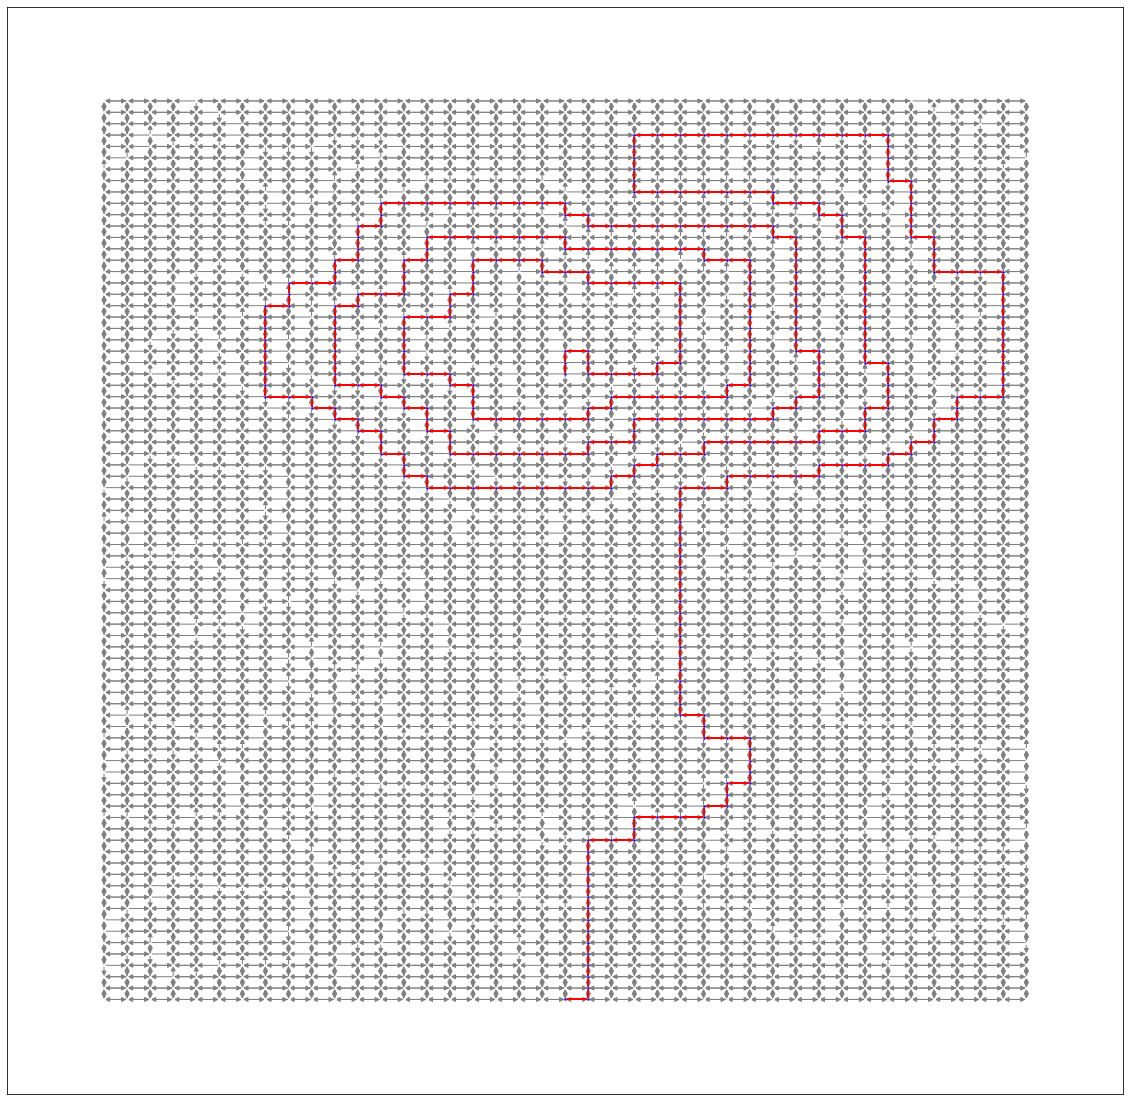

path length: 391
done


In [97]:
datafile = 'Day12Puzzle.txt'

import networkx as nx
import matplotlib.pyplot as plt


def load_data():
    print("Loading data from {}".format(datafile))
    with open(datafile) as infile:
        grid = [list(line.strip()) for line in infile]
    return grid
    
def build_graph(grid):
    print("Locating source, target")
    all_sources = []
    source = target = None
    for row_index, row in enumerate(grid):
        for column_index, c in enumerate(row):
            if c == 'S':
                source = (row_index, column_index)
                print("  identified source: {}".format(source))
                grid[row_index][column_index] = 'a'
            if c == 'E':
                target = (row_index, column_index)
                print("  identified target: {}".format(source))
                grid[row_index][column_index] = 'z'
            
            if grid[row_index][column_index] == 'a':
                all_sources.append((row_index, column_index))

    print(" start {}, end {}".format(source, target))
    
    print("Building grid graph")
    grid_shape = [len(grid[0]), len(grid)]
    # g = nx.grid_2d_graph(len(grid), len(grid[0]))
    g = nx.grid_graph(grid_shape)
    dg = nx.DiGraph()
    
    # convert all the elevation letters to integer values
    print("Convering elevation from lowercase to numeric values")
    grid = [[ord(c)-ord("a") for c in row] for row in grid]
    
    # create all appropriate edges
    # by looping through the grid and checking neighbors
    # against the current node
    positions = {}
    for node in g.nodes:
        positions[node] = (node[0], node[1])
        # print("Node {}: neighbors = {}".format(node, list(g.neighbors(node))))
        this_elevation = grid[node[0]][node[1]]
        for neighbor in list(g.neighbors(node)):
            neighbor_elevation = grid[neighbor[0]][neighbor[1]]
            if neighbor_elevation - this_elevation < 2: # could be 0 or 1 to be ok
                # print("Adding edge between node {}[{}] and neighbor {}[{}]".format(node,
                #                                                                    this_elevation,
                #                                                                    neighbor,
                #                                                                    neighbor_elevation))
                if True:
                    dg.add_edge(node, neighbor)
            else:
                if False:
                    print("NO VALID EDGE between node {}[{}] and neighbor {}[{}]".format(node,
                                                                                   this_elevation,
                                                                                   neighbor,
                                                                                   neighbor_elevation))

            
   
    print("Completed graph prep")
    options = {
        "font_size": 1,
        "node_size": 1,
        "node_color": "white",
        "edge_color": "gray",
        "linewidths": 2,
        "with_labels": False,
    }

    # source=(0,0)
    # target=(0,0)
    plt.figure(1,figsize=(20,20)) 
    nx.draw_networkx(dg, pos=positions, **options)
    paths = nx.shortest_path(dg, source, target)
    path_edges = list(zip(paths,paths[1:]))
    nx.draw_networkx_nodes(dg, pos=positions, nodelist=paths, node_color='b', node_size=2)
    nx.draw_networkx_edges(dg, pos=positions, edgelist=path_edges,edge_color='r',width=2, arrows=False)
    # nx.draw_networkx_edges(g, paths, edge_color='r', width=2)
    plt.show()
    print("path length: {}".format(len(paths)-1)) # it's 392...but they wanted STEPS, so it's 391
    return g, grid, source, target, all_sources


# def build_paths(grid):
#     grid = [[ord(c)-ord("a") for c in row] for row in grid]
    
    
#     return grid
 
build_graph(load_data())
print("done")

## Problem 1

What is the fewest number of steps required to move from your current position to the location that should get the best signal?

In [ ]:
import matplotlib as plt
import numpy as np

print("Problem 1 begins...")
g, grid, source, target, all_sources = build_graph(load_data())


print("Grid is {} x {}".format(len(grid), len(grid[0])))
def weight_function(a, b, edge_dict):
    # a and b are tuples
    if grid[a[0]][a[1]] < grid[b[0]][b[1]] - 1:
        return None
    return 1
print("Finding shortest path from {} to {}".format(source, target))
path = nx.shortest_path(g, source, target, weight_function)
print("Located path, length = {}".format(len(path)))
print(path)

for row_index, row in enumerate(grid):
    for column_index, c in enumerate(row):
        nx.set_node_attributes(g, .node[(row_index, column_index)] = grid[row_index][column_index]
        
for n in g.nodes():
    print(n, grid[n[0]][n[1]])


In [31]:
len(grid[0])

80

In [96]:
import sys

I = { (x,y): c for y, line in enumerate(open("Day12Puzzle.txt").readlines()) 
               for x, c in enumerate(line.strip()) }

def adjecents(xy):
    (x, y) = xy
    return [(x+1, y), (x-1, y), (x, y+1), (x, y-1)]

def is_possible_move(xy, nxy):
    return ord(I[nxy].replace("E", 'z')) - ord(I[xy].replace("S", "a")) <= 1 if nxy in I else False

def possible_adjecents(xy):
    return (nxy for nxy in adjecents(xy) if is_possible_move(xy, nxy))

def flood(dist, layers):
    edge = set(nxy for xy in layers[-1] 
                   for nxy in possible_adjecents(xy) if nxy not in dist)

    dist.update({ xy: len(layers) for xy in edge })

    if edge:    
        flood(dist, layers + [edge])

def distance(start, end):
    dist = { start: 0 }
    flood(dist, [{start}])
    return dist[end] if end in dist else 9999

def find_all(values):
    return (xy for (xy, v) in I.items() if v in values)

def find(value):
    return next(find_all(value))

print("1:", distance(find("S"), find("E")))
print("2:", min(distance(start, find("E")) for start in find_all(['a', 'S'])))        

1: 391
2: 386


## Problem 2

As you walk up the hill, you suspect that the Elves will want to turn this into a hiking trail. The beginning isn't very scenic, though; perhaps you can find a better starting point.

To maximize exercise while hiking, the trail should start as low as possible: elevation a. The goal is still the square marked E. However, the trail should still be direct, taking the fewest steps to reach its goal. So, you'll need to find the shortest path from any square at elevation a to the square marked E.

### Observation:
Can probably use the same code by swapping start/end and still finding the shortest path

---
# Day 13

Distress Signal

You climb the hill from Day 12 again, and you receive a distress signal, but the packets aren't in-order. You need to reorder them in order to properly decode the message.

Data (in the file) is pairs of packets, separated by a blank line:

```
[1,1,3,1,1]
[1,1,5,1,1]

[[1],[2,3,4]]
[[1],4]

[9]
[[8,7,6]]

[[4,4],4,4]
[[4,4],4,4,4]

[7,7,7,7]
[7,7,7]

[]
[3]

[[[]]]
[[]]

[1,[2,[3,[4,[5,6,7]]]],8,9]
[1,[2,[3,[4,[5,6,0]]]],8,9]
```
The data consists of lists and integers. Each list starts/ends with `[` and `]`, and contains zero or more comma-separated values (integers or, possibly, other lists). Every line, though, is it's own packet.

Packets are **left** and **right**. The rules are:
1. If **LEFT & RIGHT** are integers, the **lower intger** must come first, and if this is the case then the inputs are in the right order.
    - if it's **LARGER, SMALLER** they're not in the right order.
    - otherwise, they should be the same integer; continue checking next part of the input
1. If **LEFT & RIGHT** are lists, compare the lists item-wise: both 1st element, both 2nd element, etc.
    - if the **LEFT** list runs out of items first, they're in the right order.
    - if the **RIGHT** list runs out of items first, they're in the wrong order
    - (Thus, left must be shorter than right)
    - if they are of the same length and no comparison makes a decision order, continue checking next part of the input
1. if **exactly one value is an integer**, convert it to a list containing that integer, then retry the comparison. For example, comparing `[0,0,0]` and `2`, convert the right value to `[2]` (a list containing the integer); the result is then found by comparing `[0,0,0]` and `[2]`

Example:
```
== Pair 1 ==
- Compare [1,1,3,1,1] vs [1,1,5,1,1]
  - Compare 1 vs 1
  - Compare 1 vs 1
  - Compare 3 vs 5
    - Left side is smaller, so inputs are in the right order

== Pair 2 ==
- Compare [[1],[2,3,4]] vs [[1],4]
  - Compare [1] vs [1]
    - Compare 1 vs 1
  - Compare [2,3,4] vs 4
    - Mixed types; convert right to [4] and retry comparison
    - Compare [2,3,4] vs [4]
      - Compare 2 vs 4
        - Left side is smaller, so inputs are in the right order

== Pair 3 ==
- Compare [9] vs [[8,7,6]]
  - Compare 9 vs [8,7,6]
    - Mixed types; convert left to [9] and retry comparison
    - Compare [9] vs [8,7,6]
      - Compare 9 vs 8
        - Right side is smaller, so inputs are not in the right order

== Pair 4 ==
- Compare [[4,4],4,4] vs [[4,4],4,4,4]
  - Compare [4,4] vs [4,4]
    - Compare 4 vs 4
    - Compare 4 vs 4
  - Compare 4 vs 4
  - Compare 4 vs 4
  - Left side ran out of items, so inputs are in the right order

== Pair 5 ==
- Compare [7,7,7,7] vs [7,7,7]
  - Compare 7 vs 7
  - Compare 7 vs 7
  - Compare 7 vs 7
  - Right side ran out of items, so inputs are not in the right order

== Pair 6 ==
- Compare [] vs [3]
  - Left side ran out of items, so inputs are in the right order

== Pair 7 ==
- Compare [[[]]] vs [[]]
  - Compare [[]] vs []
    - Right side ran out of items, so inputs are not in the right order

== Pair 8 ==
- Compare [1,[2,[3,[4,[5,6,7]]]],8,9] vs [1,[2,[3,[4,[5,6,0]]]],8,9]
  - Compare 1 vs 1
  - Compare [2,[3,[4,[5,6,7]]]] vs [2,[3,[4,[5,6,0]]]]
    - Compare 2 vs 2
    - Compare [3,[4,[5,6,7]]] vs [3,[4,[5,6,0]]]
      - Compare 3 vs 3
      - Compare [4,[5,6,7]] vs [4,[5,6,0]]
        - Compare 4 vs 4
        - Compare [5,6,7] vs [5,6,0]
          - Compare 5 vs 5
          - Compare 6 vs 6
          - Compare 7 vs 0
            - Right side is smaller, so inputs are not in the right order
```

What are the indices of the pairs that are already **in the right order**?

(The first pair has index 1, next index 2, etc ... it's 1 based, not zero)

In the example above, those in the right order are 1, 2, 4, and 6. Their sum is 13.


## Problem 1

Given the input file for this problem, determine which packets are **already in the right order** and report **what is the sum of the indices of those pairs**?

In [119]:
import json
from functools import cmp_to_key

datafile = 'Day13Puzzle.txt'


def compare(left, right):
    # this is the heart of it all, embodying the business rules
    # of the comparisons
    
    # both ints? Do simple/normal comparison
    if isinstance(left, int) and isinstance(right, int):
        if left < right: return -1
        if left > right: return +1
        return 0
    else:
        # otherwise, hmm, we hvae mixed stuff going on
        # so conditionally "fix" the left and right appropriately
        left = list([left]) if isinstance(left, int) else left
        right = list([right]) if isinstance(right, int) else right
        
        # check for empty lists, degenerate cases for comparison
        if len(left) == 0 and len(right) != 0: return -1 
        if len(right) == 0 and len(left) != 0: return +1
        if len(left) == 0 and len(right) == 0: return 0
        
        # recurse here and do individual per-index comparisons
        if (ret := compare(left[0], right[0])) != 0:
            return ret
        else:
            # compare the remainder of the left/right lists
            return compare(left[1:], right[1:])

def part_one(input_raw: str) -> int:
    # split the raw input into the packet pairs, using the blank newline
    # iterate over the pairs
    #  the text block representing the pair gets split by its own newline
    #  convert the text representation of the pair into a legit lists
    #    by using the json loader/parser, resulting in a list
    pairs = [map(json.loads, pair.split()) for pair in input_raw.rstrip().split('\n\n')]
    
    # then enumerate that list of pairs and sum if they compare according to the rules
    return sum(i+1 for i,(left,right) in enumerate(pairs) if compare(left, right) < 0)

data = None
with open(datafile) as infile:
    data = infile.read(None)

print("Sum of all properly ordered packets = {}".format(part_one(data)))

Sum of all properly ordered packets = 5350


## Problem 2

Now you need to put them all in order, and disregard the blank lines.

You need to include two additional **divider packets**:

```
[[2]]
[[6]]
```

Where to put the divider packets? Well, they'll be inserted in order, such that the packets leading values are sorted in ascending order.

To get the decoder key that you desperately need, you need to then locate the divider packets and multiply their ones-based indices to yield the decoder key.

Q: **what is the decoder key for the distress signal**?

In [130]:
def part_two(input_raw: str) -> int:
    # read the input, split it all by newlines, keeping only the lines with
    # actual data (ignore the double newline thing)
    #
    # pass every line through the json.loads() method to convert it to
    # real data (and not just the text string)
    # Then extend that collection by appending both of the divider packets
    # into the collection.
    packets = [json.loads(p) for p in input_raw.rstrip().split('\n') if len(p)>0]
    print("original packets, stripped of newlines; len = {}".format(len(packets)))
    packets.extend([[[2]], [[6]]])
    print("after adding the dividers; len = {}".format(len(packets)))
    packets.sort(key=cmp_to_key(compare))
    return (packets.index([[2]])+1) * (packets.index([[6]])+1)

print("Product of the divider packets' indices = {}".format(part_two(data)))

original packets, stripped of newlines; len = 300
after adding the dividers; len = 302
Product of the divider packets' indices = 19570
